In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [14:20<00:00, 2.86MB/s]

Extracting files...


Path to dataset files: C:\Users\Olaoye Boluwatife\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Path to the downloaded dataset
dataset_path = r"C:\Users\Olaoye Boluwatife\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2"  # Replace with the actual path returned by kagglehub

In [11]:
# Directories for training, validation, and testing
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

In [12]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly apply shearing
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode="nearest",  # Fill missing pixels
)

In [13]:
# No augmentation for validation and testing, just rescaling
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [14]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode="binary",  # Binary classification
)

Found 5216 images belonging to 2 classes.


In [15]:
# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
)

Found 16 images belonging to 2 classes.


In [16]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
)

print("Dataset loaded successfully!")

Found 624 images belonging to 2 classes.
Dataset loaded successfully!


#### Check Class Indices:
    * To verify how the labels are mapped, you can check the class indices after loading:

In [17]:
print("Class indices for training data:", train_generator.class_indices)


Class indices for training data: {'NORMAL': 0, 'PNEUMONIA': 1}


#### 1. Build a CNN Model
    Using a Convolutional Neural Network (CNN) for image classification. 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\Olaoye Boluwatife\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

#####    Model Insights
   * Convolutional Layers:

    - Extract spatial features like edges, textures, and patterns from images.
    - Depth (number of filters) increases with each layer to learn more complex features.
   * Pooling Layers:

    - Reduce the spatial size of feature maps to make the model computationally efficient.
    - Helps in retaining essential features while discarding noise.
   * Fully Connected Layers:

    - Learn patterns and make predictions based on the extracted features.
   * Dropout:

    - Prevents overfitting by reducing reliance on specific neurons during training.

#### 2. Train the Model
    * Train the model using the train_generator and validate with val_generator

In [19]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Number of epochs (adjust based on performance)
    validation_data=val_generator
)


C:\Users\Olaoye Boluwatife\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.7452 - loss: 0.6220 - val_accuracy: 0.7500 - val_loss: 0.6535
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.8265 - loss: 0.3536 - val_accuracy: 0.8125 - val_loss: 0.7984
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.8526 - loss: 0.3144 - val_accuracy: 0.8125 - val_loss: 0.4216
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8604 - loss: 0.3294 - val_accuracy: 0.8125 - val_loss: 0.5865
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.8847 - loss: 0.2614 - val_accuracy: 0.7500 - val_loss: 0.8463
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.8901 - loss: 0.2565 - val_accuracy: 0.6250 - val_loss: 1.1642
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8876 - loss: 0.2640 - val_accuracy: 0.7500 - val_loss: 0.8280
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.8978 - loss: 0.2456 - val_accu

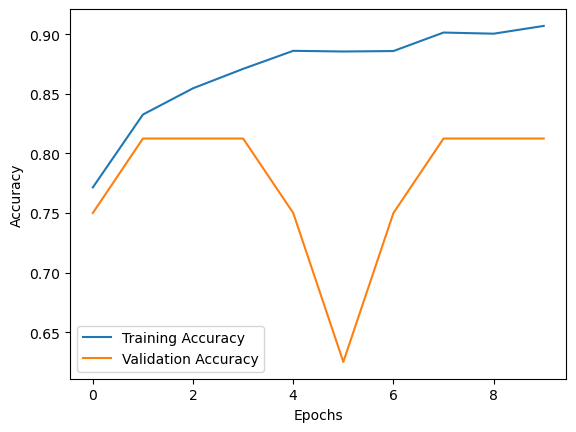

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Insights
* Overfitting:

    The model shows signs of overfitting starting around Epoch 5. While training accuracy continues to improve, validation accuracy and loss do not improve consistently.
* Validation Metrics:

    Validation accuracy and loss are more reliable indicators of the model's performance on unseen data. The model's validation accuracy stabilizes at around 81.25%, but the fluctuating validation loss suggests room for improvement.
* Training Time:

    The training time decreases after the first epoch, likely due to data loading optimizations or caching.

#### valuate the Model
    Evaluate the model using the test dataset.

In [21]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8559 - loss: 0.3650
Test Accuracy: 83.65%


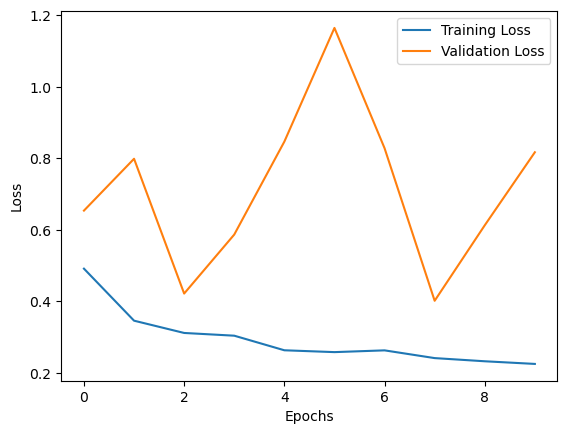

In [23]:
import matplotlib.pyplot as plt



# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Insights
* Generalization:

    The model seems to generalize fairly well to new, unseen data, as indicated by the test accuracy.
    The accuracy gap between training and test datasets is not very large, suggesting the model isn't severely overfitting.
##### Potential for Improvement:
    Although the test accuracy is good, there may still be room for improvement in terms of further reducing loss or increasing accuracy. You can consider applying additional techniques such as:
* Hyperparameter tuning: Experiment with different architectures, optimizers, or learning rates.
* Regularization: Add more regularization techniques (like L2 regularization or data augmentation) to prevent potential overfitting in future models.


#### 5. Make Predictions
    Using  the trained model to predict on new images or test samples.

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a single image for prediction
img_path = "C:\\Users\\Olaoye Boluwatife\\.cache\\kagglehub\\datasets\\paultimothymooney\\chest-xray-pneumonia\\versions\\2\\test\\PNEUMONIA\\person1_virus_7.jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)
print("Prediction (0=Normal, 1=Pneumonia):", int(prediction[0][0] > 0.5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step
Prediction (0=Normal, 1=Pneumonia): 1


The model has made a prediction for the image you provided. The output indicates that the prediction is:

1 (Pneumonia)
This means that the model has classified the image as showing signs of pneumonia based on the training data it was exposed to. The output of 1 corresponds to the Pneumonia class, and 0 would indicate a Normal (non-pneumonia) image.

#### 6. Save the Model
    Save the trained model for future use.

In [30]:
model.save("pneumonia_detection_model.h5")
